In [1]:
# Importar las librerias
import pandas as pd

In [9]:
# Cargar el csv
heart_cleveland = pd.read_csv("heart_cleveland_upload.csv")

In [12]:
heart_cleveland.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
0,69,1,0,160,234,1,2,131,0,0.1,1,1,0,0
1,69,0,0,140,239,0,0,151,0,1.8,0,2,0,0
2,66,0,0,150,226,0,0,114,0,2.6,2,0,0,0
3,65,1,0,138,282,1,2,174,0,1.4,1,1,0,1
4,64,1,0,110,211,0,2,144,1,1.8,1,0,0,0


In [1]:
# Importar las librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar el archivo CSV
data = pd.read_csv('heart_cleveland_upload.csv')

# Mostrar información básica sobre el dataset
print(data.info())

# Descripción estadística de las variables numéricas
print(data.describe())

# Mostrar valores nulos, si los hay
print(data.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297 entries, 0 to 296
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        297 non-null    int64  
 1   sex        297 non-null    int64  
 2   cp         297 non-null    int64  
 3   trestbps   297 non-null    int64  
 4   chol       297 non-null    int64  
 5   fbs        297 non-null    int64  
 6   restecg    297 non-null    int64  
 7   thalach    297 non-null    int64  
 8   exang      297 non-null    int64  
 9   oldpeak    297 non-null    float64
 10  slope      297 non-null    int64  
 11  ca         297 non-null    int64  
 12  thal       297 non-null    int64  
 13  condition  297 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 32.6 KB
None
              age         sex          cp    trestbps        chol         fbs  \
count  297.000000  297.000000  297.000000  297.000000  297.000000  297.000000   
mean    54.542088    0.676768    2.1

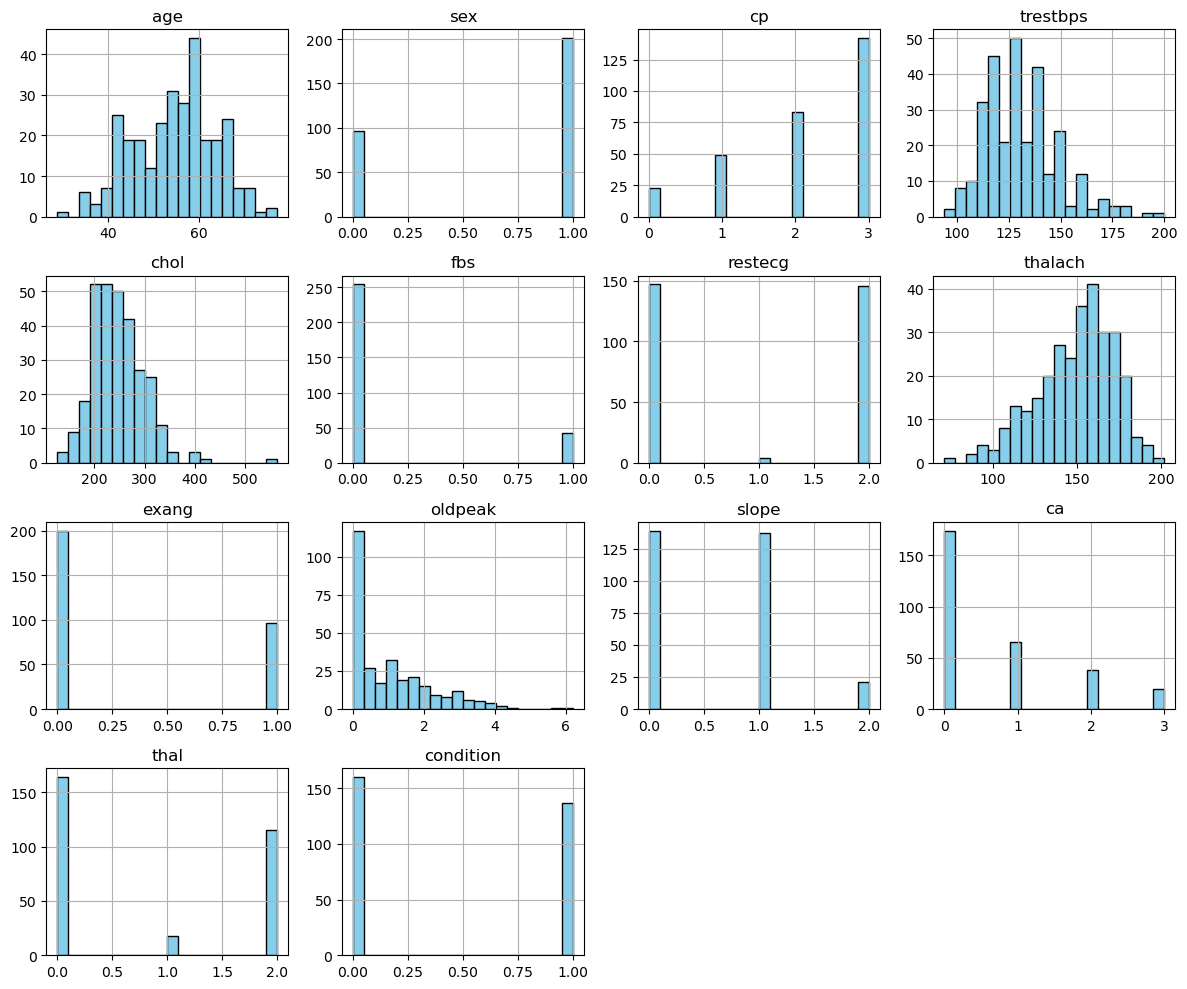

In [3]:
# Distribución de las variables numéricas con histogramas
data.hist(figsize=(12, 10), bins=20, color='skyblue', edgecolor='black')
plt.tight_layout()
plt.show()


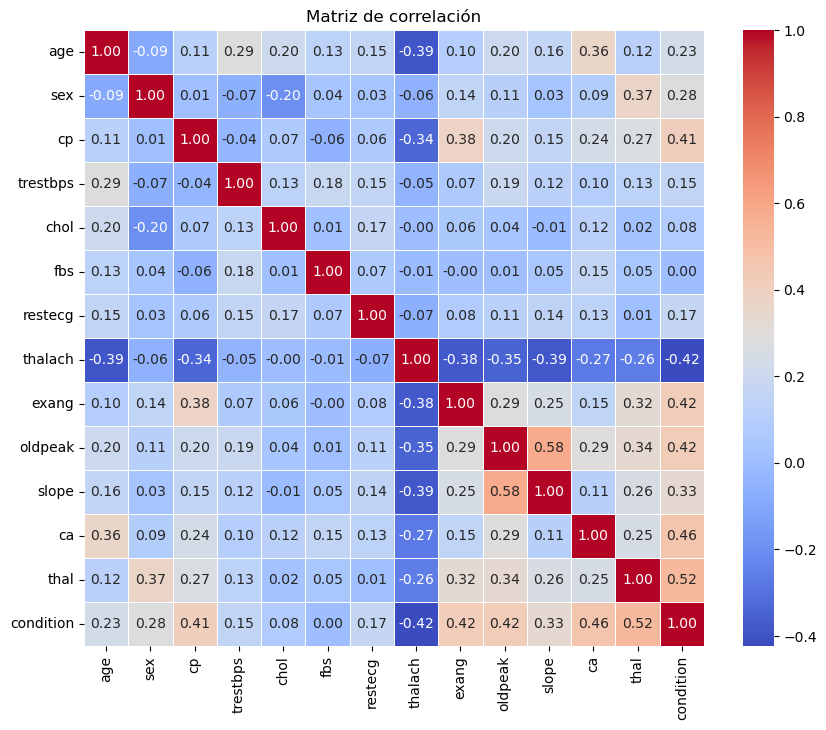

In [5]:
# Matriz de correlación
corr_matrix = data.corr()

# Mapa de calor de la correlación
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Matriz de correlación')
plt.show()


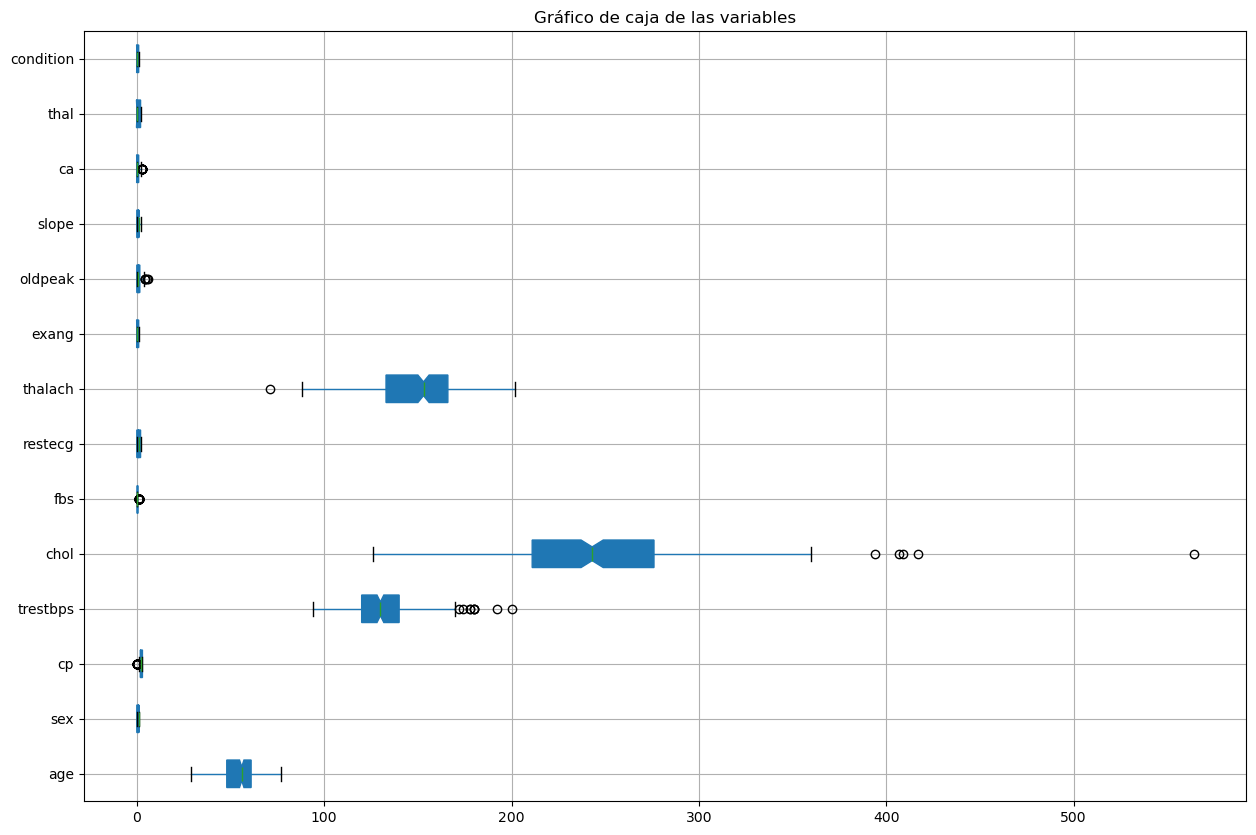

In [7]:
# Gráficos de caja para identificar valores atípicos
plt.figure(figsize=(15, 10))
data.boxplot(patch_artist=True, notch=True, vert=False)
plt.title('Gráfico de caja de las variables')
plt.show()


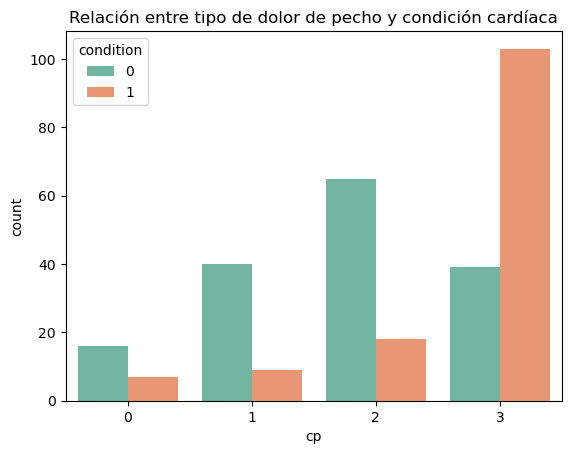

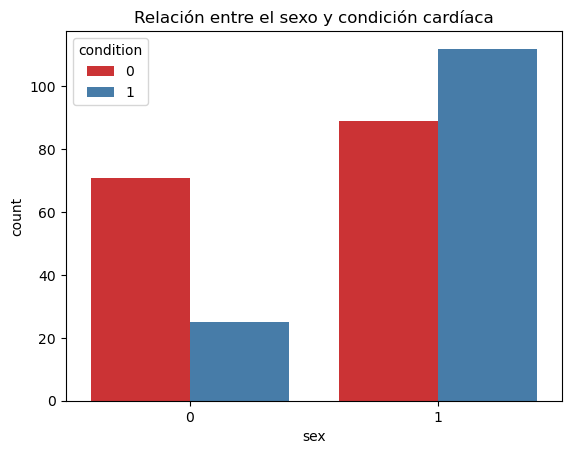

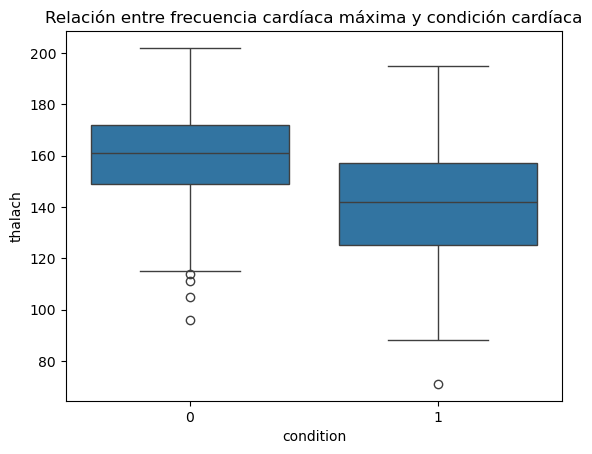

In [9]:
# Relación entre el tipo de dolor de pecho y la condición cardíaca
sns.countplot(x='cp', hue='condition', data=data, palette='Set2')
plt.title('Relación entre tipo de dolor de pecho y condición cardíaca')
plt.show()

# Relación entre el sexo y la condición cardíaca
sns.countplot(x='sex', hue='condition', data=data, palette='Set1')
plt.title('Relación entre el sexo y condición cardíaca')
plt.show()

# Relación entre la frecuencia cardíaca máxima y la condición cardíaca
sns.boxplot(x='condition', y='thalach', data=data)
plt.title('Relación entre frecuencia cardíaca máxima y condición cardíaca')
plt.show()


In [ ]:
2. Preprocesar los datos limpiándolos, tratando valores faltantes y transformándolos según sea necesario.

In [21]:
# Verificar si hay valores nulos en el dataset
missing_values = data.isnull().sum()

print("Valores nulos en cada columna:\n")
print(missing_values)

# Si hubiera valores nulos, este mensaje se mostraría
if missing_values.any():
    print("\nExisten valores nulos en el dataset. Tratándolos...")
    # Por ejemplo, imputar valores con la media
    data.fillna(data.mean(), inplace=True)
else:
    print("\nNo se encontraron valores nulos. No es necesario tratarlos.")


Valores nulos en cada columna:

age          0
sex          0
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
thalach      0
exang        0
oldpeak      0
slope        0
ca           0
thal         0
condition    0
dtype: int64

No se encontraron valores nulos. No es necesario tratarlos.


In [23]:
# Convertir variables categóricas a variables dummies
data_processed = pd.get_dummies(data, columns=['cp', 'restecg', 'slope', 'thal', 'ca'], drop_first=True)

print("\nVariables categóricas convertidas a dummies. Primeras filas del dataset procesado:\n")
print(data_processed.head())

# Verificar la nueva estructura de datos
print(f"\nEl nuevo dataset tiene {data_processed.shape[1]} columnas después de la transformación.\n")



Variables categóricas convertidas a dummies. Primeras filas del dataset procesado:

   age  sex  trestbps  chol  fbs  thalach  exang  oldpeak  condition   cp_1  \
0   69    1       160   234    1      131      0      0.1          0  False   
1   69    0       140   239    0      151      0      1.8          0  False   
2   66    0       150   226    0      114      0      2.6          0  False   
3   65    1       138   282    1      174      0      1.4          1  False   
4   64    1       110   211    0      144      1      1.8          0  False   

   ...   cp_3  restecg_1  restecg_2  slope_1  slope_2  thal_1  thal_2   ca_1  \
0  ...  False      False       True     True    False   False   False   True   
1  ...  False      False      False    False    False   False   False  False   
2  ...  False      False      False    False     True   False   False  False   
3  ...  False      False       True     True    False   False   False   True   
4  ...  False      False       True     

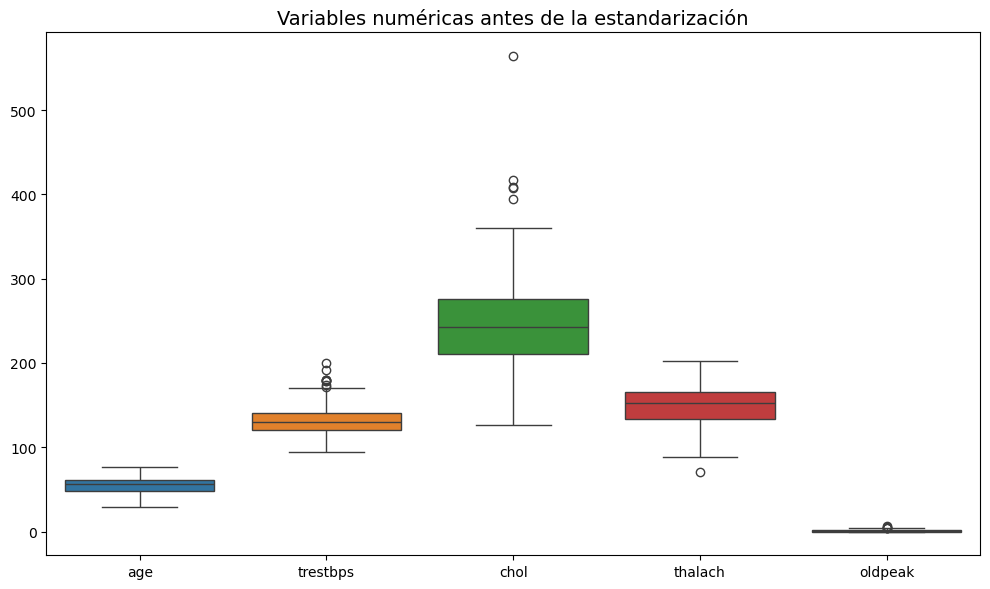

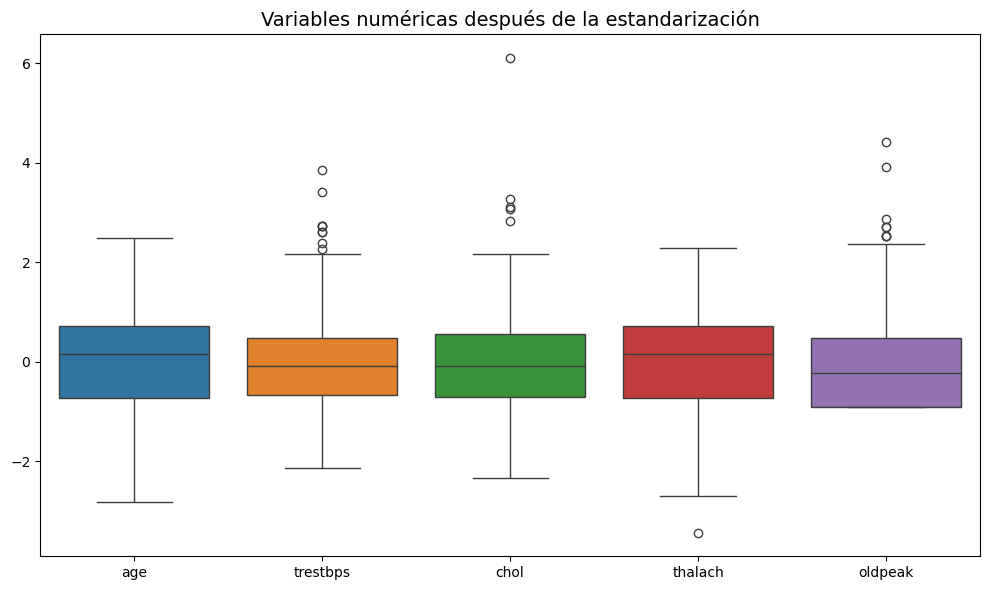


Variables numéricas estandarizadas.



In [25]:
from sklearn.preprocessing import StandardScaler

# Visualización antes de la estandarización
plt.figure(figsize=(10, 6))
sns.boxplot(data=data[['age', 'trestbps', 'chol', 'thalach', 'oldpeak']])
plt.title("Variables numéricas antes de la estandarización", fontsize=14)
plt.tight_layout()
plt.show()

# Estandarizar las variables numéricas
scaler = StandardScaler()
columns_to_scale = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
data_processed[columns_to_scale] = scaler.fit_transform(data_processed[columns_to_scale])

# Visualización después de la estandarización
plt.figure(figsize=(10, 6))
sns.boxplot(data=data_processed[['age', 'trestbps', 'chol', 'thalach', 'oldpeak']])
plt.title("Variables numéricas después de la estandarización", fontsize=14)
plt.tight_layout()
plt.show()

print("\nVariables numéricas estandarizadas.\n")


In [27]:
from sklearn.model_selection import train_test_split

# Definir las variables predictoras (X) y la variable objetivo (y)
X = data_processed.drop('condition', axis=1)
y = data_processed['condition']

# Dividir el conjunto de datos en entrenamiento (70%) y prueba (30%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Mostrar las dimensiones de los datos de entrenamiento y prueba
print(f"Datos de entrenamiento: {X_train.shape[0]} filas, {X_train.shape[1]} columnas")
print(f"Datos de prueba: {X_test.shape[0]} filas, {X_test.shape[1]} columnas")


Datos de entrenamiento: 207 filas, 20 columnas
Datos de prueba: 90 filas, 20 columnas


In [ ]:
3. Seleccionar las características más relevantes para entrenar el modelo utilizando selección de características.

In [37]:
# Correlación entre las características y la variable objetivo 'condition'
corr_matrix = data_processed.corr()

# Extraer las características que tienen alta correlación con la variable objetivo
corr_with_target = corr_matrix['condition'].sort_values(ascending=False)

# Mostrar las características más correlacionadas con 'condition'
print(corr_with_target)


condition    1.000000
cp_3         0.507035
thal_2       0.484657
oldpeak      0.424052
exang        0.421355
slope_1      0.349635
sex          0.278467
ca_2         0.272400
ca_1         0.228974
age          0.227075
ca_3         0.209531
restecg_2    0.157440
trestbps     0.153490
thal_1       0.104651
chol         0.080285
restecg_1    0.067672
slope_2      0.060950
fbs          0.003167
cp_1        -0.247535
cp_2        -0.305345
thalach     -0.423817
Name: condition, dtype: float64


In [15]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris

# Cargar datos y dividir en entrenamiento/prueba
X, y = load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Modelo de regresión logística y selección de características (RFE)
model = LogisticRegression(max_iter=1000)
rfe = RFE(model, n_features_to_select=2)
fit = rfe.fit(X_train, y_train)

# Mostrar resultados
selected_features = [name for i, name in enumerate(load_iris().feature_names) if fit.support_[i]]
print(f"Características seleccionadas por RFE: {', '.join(selected_features)}")


Características seleccionadas por RFE: petal length (cm), petal width (cm)


In [ ]:
4. Dividir el dataset en Train y Test para evaluar correctamente el modelo.


In [24]:
# Importar las librerías necesarias
import pandas as pd
from sklearn.model_selection import train_test_split

# Cargar el archivo CSV
file_path = 'heart_cleveland_upload.csv'  # Ruta correcta del archivo
data = pd.read_csv(file_path)

# Definir las variables predictoras (X) y la variable objetivo (y)
X = data.drop('condition', axis=1)  # 'condition' es la variable objetivo
y = data['condition']  # Variable objetivo

# Dividir el dataset en conjuntos de entrenamiento (70%) y prueba (30%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Mostrar las dimensiones de los datos de entrenamiento y prueba
print(f"\nTamaño del conjunto de entrenamiento (X_train): {X_train.shape[0]} filas, {X_train.shape[1]} columnas")
print(f"Tamaño del conjunto de prueba (X_test): {X_test.shape[0]} filas, {X_test.shape[1]} columnas")

# Mostrar la distribución de la variable objetivo en el conjunto de entrenamiento y prueba
print(f"\nDistribución de la variable objetivo en el conjunto de entrenamiento:\n{y_train.value_counts(normalize=True)}")
print(f"\nDistribución de la variable objetivo en el conjunto de prueba:\n{y_test.value_counts(normalize=True)}")



Tamaño del conjunto de entrenamiento (X_train): 207 filas, 13 columnas
Tamaño del conjunto de prueba (X_test): 90 filas, 13 columnas

Distribución de la variable objetivo en el conjunto de entrenamiento:
condition
0    0.541063
1    0.458937
Name: proportion, dtype: float64

Distribución de la variable objetivo en el conjunto de prueba:
condition
0    0.533333
1    0.466667
Name: proportion, dtype: float64


In [ ]:
5. Entrenar el modelo configurando los diferentes hiperparámetros.

In [26]:
# Importar las librerías necesarias
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Definir el modelo de Regresión Logística con hiperparámetros
# Ajustamos el parámetro C y el solver, pero puedes cambiar estos valores
model = LogisticRegression(C=1.0, solver='liblinear', max_iter=100)

# Entrenar el modelo con los datos de entrenamiento
model.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

# Evaluar el rendimiento del modelo
accuracy = accuracy_score(y_test, y_pred)
print(f"Exactitud del modelo: {accuracy:.4f}")

# Mostrar el reporte de clasificación (precisión, recall, f1-score)
print("\nReporte de clasificación:")
print(classification_report(y_test, y_pred))


Exactitud del modelo: 0.8889

Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.85      0.96      0.90        48
           1       0.94      0.81      0.87        42

    accuracy                           0.89        90
   macro avg       0.90      0.88      0.89        90
weighted avg       0.90      0.89      0.89        90



In [ ]:
6. Evaluar el desempeño del modelo en el conjunto de Test con métricas como precisión, recall, F1-score, etc.

Exactitud (Accuracy): 0.8889
Precisión (Precision): 0.9444
Sensibilidad (Recall): 0.8095
F1-Score: 0.8718

Reporte de clasificación completo:
              precision    recall  f1-score   support

           0       0.85      0.96      0.90        48
           1       0.94      0.81      0.87        42

    accuracy                           0.89        90
   macro avg       0.90      0.88      0.89        90
weighted avg       0.90      0.89      0.89        90



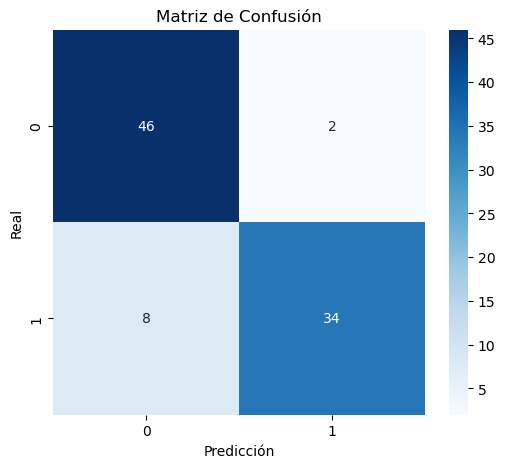

In [28]:
# Importar las métricas necesarias
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Realizar predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

# Calcular las métricas de evaluación
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Mostrar los resultados
print(f"Exactitud (Accuracy): {accuracy:.4f}")
print(f"Precisión (Precision): {precision:.4f}")
print(f"Sensibilidad (Recall): {recall:.4f}")
print(f"F1-Score: {f1:.4f}")

# Mostrar el reporte de clasificación completo
print("\nReporte de clasificación completo:")
print(classification_report(y_test, y_pred))

# Matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Matriz de Confusión')
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.show()


In [ ]:
7. Realizar las diferentes gráficas que permitan visualizar los resultados del modelo.

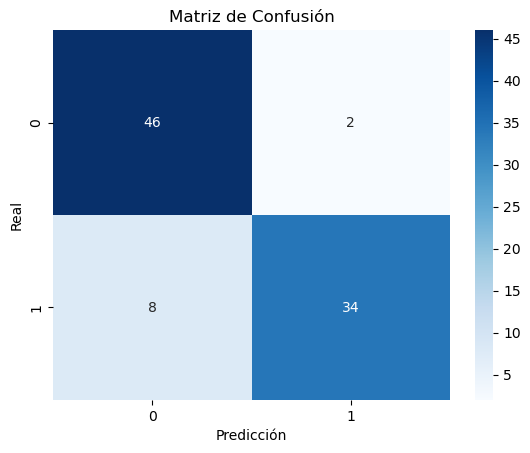

In [5]:
# Importar las librerías necesarias
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Cargar y dividir el dataset
data = pd.read_csv('heart_cleveland_upload.csv')
X, y = data.drop('condition', axis=1), data['condition']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Entrenar el modelo de Regresión Logística
model = LogisticRegression(C=1.0, solver='liblinear', max_iter=100).fit(X_train, y_train)

# Predicciones y Matriz de confusión
y_pred = model.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred)

# Visualizar la Matriz de Confusión
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Matriz de Confusión')
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.show()


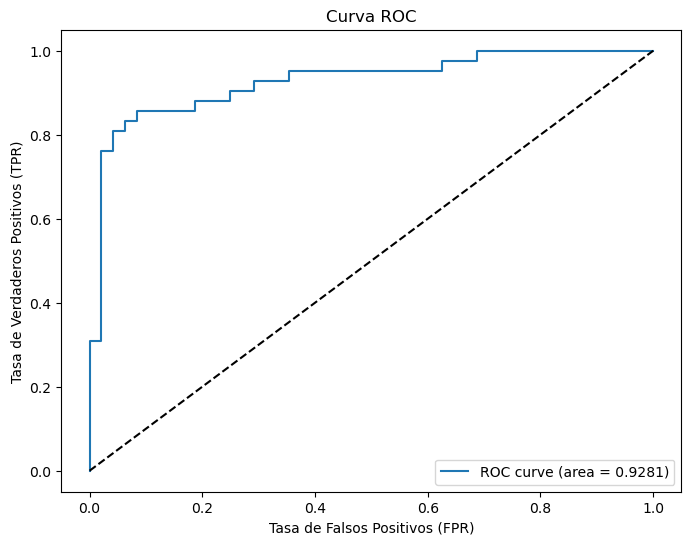

In [7]:
from sklearn.metrics import roc_curve, roc_auc_score

# Obtener las probabilidades de predicción
y_probs = model.predict_proba(X_test)[:, 1]

# Calcular la curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = roc_auc_score(y_test, y_probs)

# Gráfica de la curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], 'k--')  # Línea diagonal para un modelo aleatorio
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.title('Curva ROC')
plt.legend(loc="lower right")
plt.show()


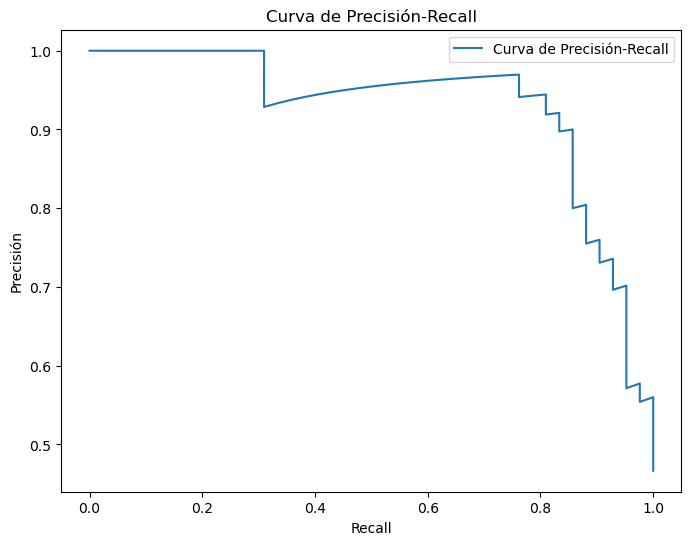

In [9]:
from sklearn.metrics import precision_recall_curve

# Calcular la curva de precisión-recall
precision, recall, thresholds_pr = precision_recall_curve(y_test, y_probs)

# Gráfica de la curva de precisión-recall
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, label='Curva de Precisión-Recall')
plt.xlabel('Recall')
plt.ylabel('Precisión')
plt.title('Curva de Precisión-Recall')
plt.legend(loc="upper right")
plt.show()


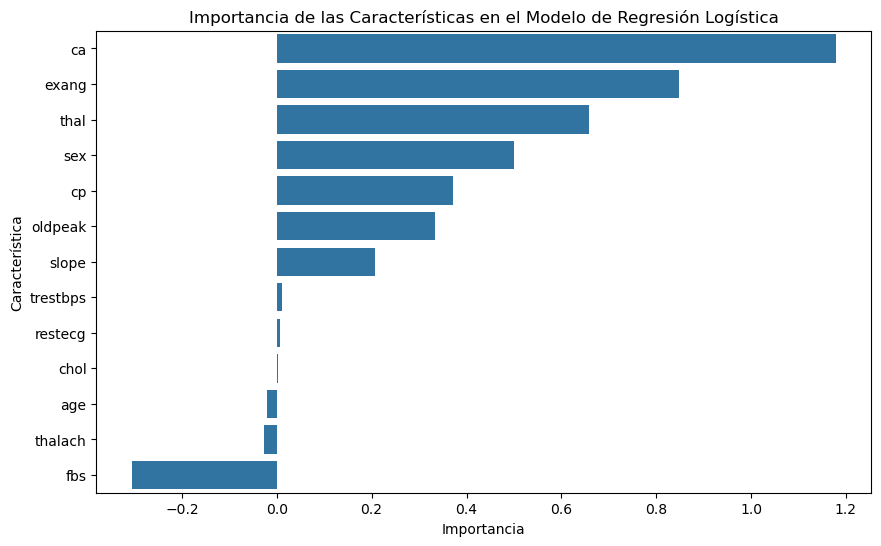

In [11]:
import numpy as np

# Obtener los coeficientes del modelo
feature_importance = model.coef_[0]

# Crear un dataframe con las características y sus coeficientes
features = X.columns
importance_df = pd.DataFrame({'Característica': features, 'Importancia': feature_importance})

# Ordenar por importancia
importance_df = importance_df.sort_values(by='Importancia', ascending=False)

# Gráfica de barras de importancia de las características
plt.figure(figsize=(10, 6))
sns.barplot(x='Importancia', y='Característica', data=importance_df)
plt.title('Importancia de las Características en el Modelo de Regresión Logística')
plt.show()
